# Projeto de Previsão de tempo de entrega de e-commerce

---

### Dados utilizados do Olist

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_orders_raw = pd.read_csv('./input/olist_orders_dataset.csv', dtype={'order_id': str})
df_order_reviews_raw = pd.read_csv('./input/olist_order_reviews_dataset.csv', dtype={'order_id': str})


In [3]:
review = df_order_reviews_raw.copy()
review.dropna(subset=['review_comment_message'], inplace=True)
review.drop(columns=['review_id', 'review_creation_date', 'review_answer_timestamp'], inplace=True)
review['review_comment_message'] = review['review_comment_message'].str.lower()
review = pd.merge(review, df_orders_raw[['order_id', 'customer_id', 'order_delivered_customer_date', 'order_estimated_delivery_date']], on='order_id', how='left')
review['delivery_delay'] = (pd.to_datetime(review['order_delivered_customer_date']) - pd.to_datetime(review['order_estimated_delivery_date'])).dt.days
review['delivery_delay'].sort_values(ascending=False)
review_filtered = review[(review['delivery_delay'] < review['delivery_delay'].quantile(0.99)) & (review['delivery_delay'] > review['delivery_delay'].quantile(0.01))]
review_filtered

,order_id,review_score,review_comment_title,review_comment_message,customer_id,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay
0,658677c97b385a9be170737859d3511b,5,NaN,recebi bem antes do prazo estipulado.,de6dff97e5f1ba84a3cd9a3bc97df5f6,2017-04-20 09:08:35,2017-05-10 00:00:00,-20.0
1,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,parabéns lojas lannister adorei comprar pela i...,5986b333ca0d44534a156a52a8e33a83,2018-02-28 16:33:35,2018-03-09 00:00:00,-9.0
2,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,a5224bdc7685fd39cd7a23404415493d,2018-05-21 17:52:12,2018-06-06 00:00:00,-16.0
3,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"mas um pouco ,travando...pelo valor ta boa.\r\n",8ebbeb09e94d1e789142983f73faa9cd,2018-02-15 19:16:54,2018-02-26 00:00:00,-11.0
4,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"vendedor confiável, produto ok e entrega antes...",659ded3e9b43aaf51cf9586d03033b46,2018-05-22 14:58:47,2018-06-07 00:00:00,-16.0
...,...,...,...,...,...,...,...,...
40972,d398e9c82363c12527f71801bf0e6100,4,NaN,para este produto recebi de acordo com a compr...,2bf76a48c3be55124221fd0657705a5d,2017-11-28 01:33:13,2017-12-11 00:00:00,-13.0
40973,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,entregou dentro do prazo. o produto chegou em ...,69f07139131eb94ecb8e5b5d601b1f7a,2018-02-06 18:12:22,2018-02-16 00:00:00,-10.0
40974,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"o produto não foi enviado com nf, não existe v...",f1622b5b691cbc9c39f10ff359043335,2018-05-18 17:12:51,2018-05-29 00:00:00,-11.0
40975,55d4004744368f5571d1f590031933e4,5,NaN,"excelente mochila, entrega super rápida. super...",fcc7b1caafe3b77fd587bab964c4d1fb,2018-03-21 17:44:08,2018-04-06 00:00:00,-16.0


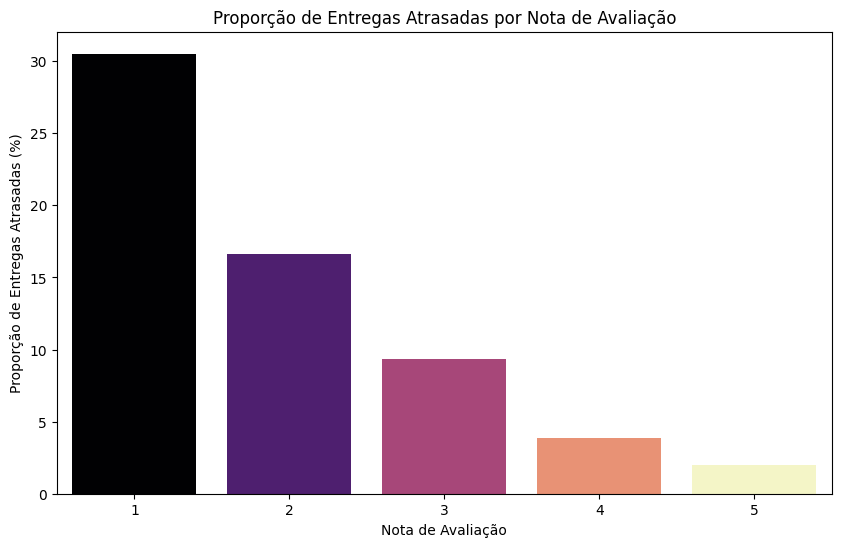

In [4]:
review_filtered = review_filtered.copy()
review_filtered['atrasou'] = review_filtered['delivery_delay'] > 0
atrasos = review_filtered['atrasou'].groupby(review_filtered['review_score']).mean().reset_index()
atrasos['atrasou'] = atrasos['atrasou'] * 100
plt.figure(figsize=(10,6))
sns.barplot(data=atrasos, x='review_score', y='atrasou', palette='magma', hue='review_score', legend=False)
plt.xlabel('Nota de Avaliação')
plt.ylabel('Proporção de Entregas Atrasadas (%)')
plt.title('Proporção de Entregas Atrasadas por Nota de Avaliação')
plt.show()

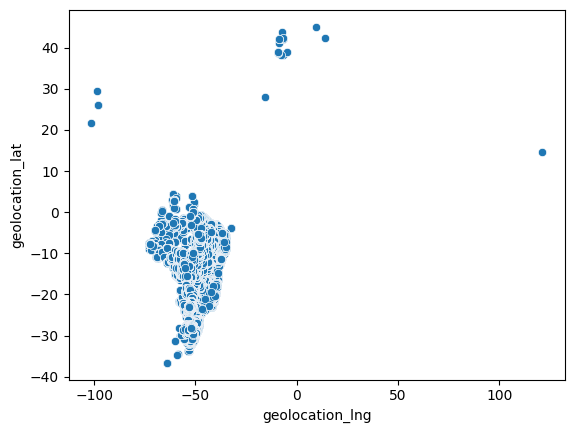

In [5]:
df_geolocation_raw = pd.read_csv('./input/olist_geolocation_dataset.csv', dtype={'geolocation_zip_code_prefix': str})

sns.scatterplot(
    y=df_geolocation_raw.geolocation_lat,
    x=df_geolocation_raw.geolocation_lng
)

plt.show()
plt.close()

Latitude e Longitude limites para o Brasil para tratamento dos dados de geolocalização
| Limite  | Valor |
|:-------:|:-----:|
| lat_max | 6.0   |
| lat_min | -34.0 |
| lgn_max | -35.0 |
| lgn_min | -74.0 |

In [6]:
geo = df_geolocation_raw.copy()

'''
Latitude e Longitude limites para o Brasil para tratamento dos dados de geolocalização
| Limite  | Valor |
|:-------:|:-----:|
| lat_max | 6.0   |
| lat_min | -34.0 |
| lgn_max | -35.0 |
| lgn_min | -74.0 |
'''

geo = geo[(geo.geolocation_lat <= 6.0) & (geo.geolocation_lat >= -34.0)]
geo = geo[(geo.geolocation_lng <= -35.0) & (geo.geolocation_lng >= -74.0)]
display(geo.info())

<class 'pandas.core.frame.DataFrame'>
Index: 988476 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  988476 non-null  object 
 1   geolocation_lat              988476 non-null  float64
 2   geolocation_lng              988476 non-null  float64
 3   geolocation_city             988476 non-null  object 
 4   geolocation_state            988476 non-null  object 
dtypes: float64(2), object(3)
memory usage: 45.2+ MB


None

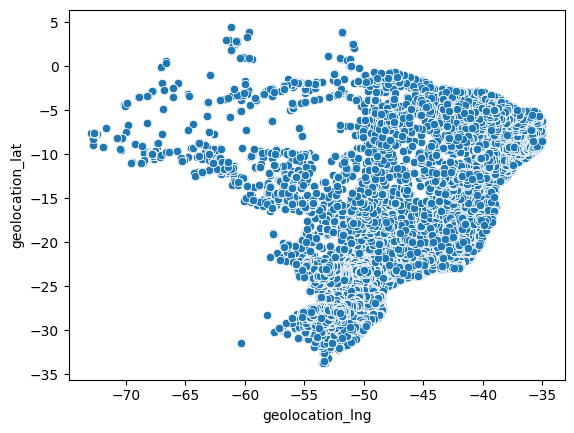

In [7]:
sns.scatterplot(
    y=geo.geolocation_lat,
    x=geo.geolocation_lng
)

plt.show()
plt.close()

In [8]:
df_order_items_raw = pd.read_csv('./input/olist_order_items_dataset.csv', dtype={'order_id': str, 'product_id': str})
df_customers_raw = pd.read_csv('./input/olist_customers_dataset.csv', dtype={'customer_id': str, 'customer_zip_code_prefix': str})
df_sellers_raw = pd.read_csv('./input/olist_sellers_dataset.csv', dtype={'seller_id': str, 'seller_zip_code_prefix': str})
df_products_raw = pd.read_csv('./input/olist_products_dataset.csv', dtype={'product_id': str})

df = pd.merge(
    df_order_items_raw,
    df_orders_raw,
    how='left',
    on='order_id'
)
df = pd.merge(
    df,
    df_customers_raw,
    how='left',
    on='customer_id'
)
df = pd.merge(
    df,
    df_sellers_raw,
    how='left',
    on='seller_id'
)
df = pd.merge(
    df,
    df_products_raw,
    how='left',
    on='product_id'
)

df['product_total_volume_cm3'] = df['product_height_cm'] * df['product_length_cm'] * df['product_width_cm']


df.dropna(inplace=True)
df = df[df['order_status'] == 'delivered']

df['tempo_entrega_dias'] = pd.to_timedelta(pd.to_datetime(df['order_delivered_customer_date']).dt.date - pd.to_datetime(df['order_purchase_timestamp']).dt.date).dt.days

df.drop(columns=['customer_unique_id',
                 'product_category_name',
                 'product_name_lenght',
                 'product_description_lenght',
                 'product_photos_qty',
                 'customer_id',
                 'order_approved_at',
                 'order_delivered_carrier_date',
                 'customer_city',
                 'customer_state',
                 'seller_city',
                 'seller_state',
                 'product_length_cm',
                 'product_height_cm',
                 'product_width_cm',
                 'product_id',
                 'order_estimated_delivery_date',
                 'seller_id',
                 'shipping_limit_date',
                 'order_delivered_customer_date',
                 'order_purchase_timestamp',
                 'order_status',
                 'order_item_id'], inplace=True)
df


,order_id,price,freight_value,customer_zip_code_prefix,seller_zip_code_prefix,product_weight_g,product_total_volume_cm3,tempo_entrega_dias
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,28013,27277,650.0,3528.0,7
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,15775,03471,30000.0,60000.0,16
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,35661,37564,3050.0,14157.0,8
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,12952,14403,200.0,2400.0,6
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,13226,87900,3750.0,42000.0,25
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,65077,88303,10150.0,53400.0,17
112646,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,81690,01206,8950.0,44460.0,9
112647,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,04039,80610,967.0,9576.0,5
112648,fffe18544ffabc95dfada21779c9644f,55.99,8.72,13289,04733,100.0,8000.0,2


In [9]:
df_mapa_geo = df_geolocation_raw.groupby('geolocation_zip_code_prefix').agg(
    lat=('geolocation_lat', 'mean'),
    lng=('geolocation_lng', 'mean'))
# ).reset_index()

df = pd.merge(
    df,
    df_mapa_geo,
    how='left',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)

df.rename(columns={
    'lat': 'customer_lat',
    'lng': 'customer_lng'
}, inplace=True)
# df.drop(columns=['geolocation_zip_code_prefix'], inplace=True)

df = pd.merge(
    df,
    df_mapa_geo,
    how='left',
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)

df.rename(columns={
    'lat': 'seller_lat',
    'lng': 'seller_lng'
}, inplace=True)
# df.drop(columns=['geolocation_zip_code_prefix'], inplace=True)
df.drop(columns=['customer_zip_code_prefix', 'seller_zip_code_prefix'], inplace=True)

df

,order_id,price,freight_value,product_weight_g,product_total_volume_cm3,tempo_entrega_dias,customer_lat,customer_lng,seller_lat,seller_lng
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,650.0,3528.0,7,-21.762775,-41.309633,-22.496953,-44.127492
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,30000.0,60000.0,16,-20.220527,-50.903424,-23.565096,-46.518565
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,3050.0,14157.0,8,-19.870305,-44.593326,-22.262584,-46.171124
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,200.0,2400.0,6,-23.089925,-46.611654,-20.553624,-47.387359
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,3750.0,42000.0,25,-23.243402,-46.827614,-22.929384,-53.135873
...,...,...,...,...,...,...,...,...,...,...
108631,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,10150.0,53400.0,17,-2.497993,-44.297761,-26.912574,-48.673980
108632,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,8950.0,44460.0,9,-25.566904,-49.309115,-23.535864,-46.642819
108633,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,967.0,9576.0,5,-23.597794,-46.643923,-25.469955,-49.289821
108634,fffe18544ffabc95dfada21779c9644f,55.99,8.72,100.0,8000.0,2,-23.040252,-46.979782,-23.635530,-46.694031


In [10]:
def haversine_vectorized(lat1, lon1, lat2, lon2):
    """
    Calcula a distância em KM entre dois pontos (ou arrays de pontos) 
    usando a fórmula de Haversine.
    
    Argumentos:
    lat1, lon1: Latitude e Longitude do ponto 1 (em graus)
    lat2, lon2: Latitude e Longitude do ponto 2 (em graus)
    
    Retorna:
    Distância em KM (pode ser um único valor ou um array do Pandas)
    """
    # Raio da Terra em quilômetros
    RAIO_TERRA_KM = 6371.0

    # 1. Converte graus decimais para radianos
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # 2. Cálculo de Haversine
    # Diferença das longitudes e latitudes
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Fórmula principal
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # 3. Distância final
    distancia = RAIO_TERRA_KM * c
    
    return distancia

In [11]:
df['distancia_km'] = haversine_vectorized(
    df['customer_lat'],
    df['customer_lng'],
    df['seller_lat'],
    df['seller_lng']
)
df.drop(columns=['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng'], inplace=True)
df

,order_id,price,freight_value,product_weight_g,product_total_volume_cm3,tempo_entrega_dias,distancia_km
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,650.0,3528.0,7,301.504681
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,30000.0,60000.0,16,585.563937
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,3050.0,14157.0,8,312.343511
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,200.0,2400.0,6,293.168420
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,3750.0,42000.0,25,646.163463
...,...,...,...,...,...,...,...
108631,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,10150.0,53400.0,17,2754.537709
108632,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,8950.0,44460.0,9,351.729420
108633,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,967.0,9576.0,5,339.056961
108634,fffe18544ffabc95dfada21779c9644f,55.99,8.72,100.0,8000.0,2,72.335998


In [12]:
df.columns.to_frame()

,0
order_id,order_id
price,price
freight_value,freight_value
product_weight_g,product_weight_g
product_total_volume_cm3,product_total_volume_cm3
tempo_entrega_dias,tempo_entrega_dias
distancia_km,distancia_km


In [13]:
df.describe()

,price,freight_value,product_weight_g,product_total_volume_cm3,tempo_entrega_dias,distancia_km
count,108636.000000,108636.000000,108636.000000,108636.000000,108636.000000,108106.000000
mean,120.087161,19.982936,2095.634725,15221.285697,12.405492,596.703045
std,182.044245,15.733818,3744.124300,23264.765858,9.443625,588.550861
min,0.850000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,39.900000,13.080000,300.000000,2856.000000,7.000000,186.660238
50%,74.900000,16.290000,700.000000,6552.000000,10.000000,432.378246
75%,134.900000,21.160000,1800.000000,18375.000000,16.000000,791.714626
max,6735.000000,409.680000,40425.000000,296208.000000,210.000000,8677.911622


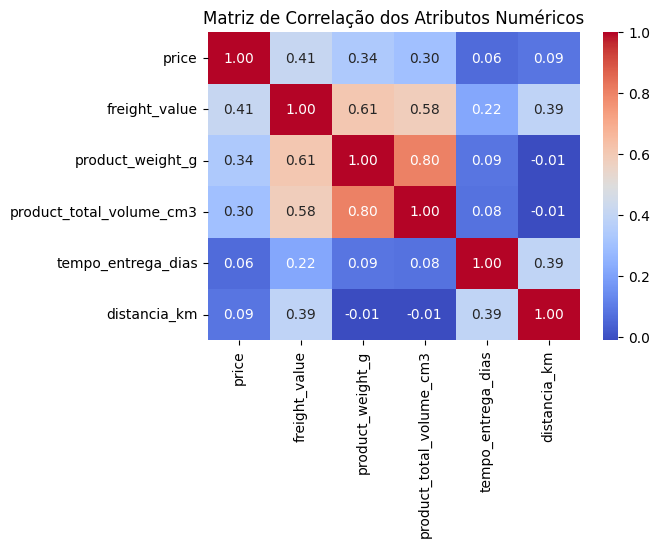

In [15]:
corr = df.drop(columns=['order_id']).corr()
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
plt.title('Matriz de Correlação dos Atributos Numéricos')
plt.show()